In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#from colocacion_de_creditos.utils.paths import data_dir

In [3]:
#df_colocado=pd.read_parquet(data_dir("interim", "datos_colocacion_limpios.parquet"))
df_colocado = pd.read_parquet('../data/raw/df_final_estudiantes.parquet')

In [4]:
df_colocado.head()

,IDENTIFICACION,PRODUCTO,PERIODO_COMERCIAL,SEGMENTO,FECHA_CARGA,FECHA_VIGENCIA,REGION,N_VECES_CAMPAÑA,N_VECES_CAMPAÑA_CONT,TIPO_APROBACION,...,APROBACION_MES_ANTERIOR,PRODUCTO_MES_ANTERIOR,MONTO_COLOCADO,fecha_liquidacion,CANAL_VENTA,CONTACTABILIDAD_CELULAR,CONTACTABILIDAD_EMAIL,CONTACTABILIDAD_FIJO,CONTACTABILIDAD_TOTAL,COLOCADO
0,0523373,Producto1,202408,SEGMENTO1,2024-08-22,2024-09-13,NORTE,19,5,TIPO1,...,TIPO1,Producto1,NaN,None,None,AC,MK,AC,AC,0
1,0523373,Producto1,202405,SEGMENTO1,2024-05-11,2024-06-11,NORTE,16,2,TIPO1,...,TIPO1,Producto1,NaN,None,None,AC,MK,AC,AC,0
2,0523373,Producto1,202406,SEGMENTO1,2024-06-12,2024-07-12,NORTE,17,3,TIPO1,...,TIPO1,Producto1,NaN,None,None,AC,MK,AC,AC,0
3,0523374,Producto1,202403,SEGMENTO1,2024-03-11,2024-04-08,NORTE,21,7,TIPO1,...,TIPO1,Producto1,NaN,None,None,AC,AC,AC,AC,0
4,0523374,Producto1,202402,SEGMENTO1,2024-02-08,2024-03-10,NORTE,20,6,TIPO1,...,TIPO1,Producto1,NaN,None,None,AC,AC,AC,AC,0


In [5]:
df_colocado.describe()

,PERIODO_COMERCIAL,N_VECES_CAMPAÑA,N_VECES_CAMPAÑA_CONT,IVC,score_aceptacion,SCORE,CUPO,MONTO_COLOCADO,COLOCADO
count,5.178528e+06,5.178528e+06,5.178528e+06,5.178528e+06,5.178528e+06,5.178528e+06,5.178528e+06,63490.000000,5.178528e+06
mean,2.024056e+05,1.714706e+01,4.224235e+00,8.741140e-01,5.549130e+02,9.581913e+02,3.472924e+03,3277.705400,1.226024e-02
std,2.862225e+00,9.460093e+00,3.821505e+00,1.295387e+00,2.373323e+02,3.645661e+01,3.755160e+03,2994.192257,1.100451e-01
min,2.024010e+05,0.000000e+00,0.000000e+00,0.000000e+00,3.400000e+01,7.000000e+02,8.024000e+02,217.982498,0.000000e+00
25%,2.024030e+05,1.000000e+01,1.000000e+00,0.000000e+00,3.540000e+02,9.470000e+02,8.024000e+02,1581.800000,0.000000e+00
50%,2.024060e+05,1.700000e+01,3.000000e+00,0.000000e+00,5.420000e+02,9.700000e+02,2.750900e+03,2556.050000,0.000000e+00
75%,2.024080e+05,2.400000e+01,7.000000e+00,2.000000e+00,7.840000e+02,9.820000e+02,4.465580e+03,3920.000000,0.000000e+00
max,2.024100e+05,5.800000e+01,3.500000e+01,8.000000e+00,9.760000e+02,9.940000e+02,2.925050e+04,97448.000000,1.000000e+00


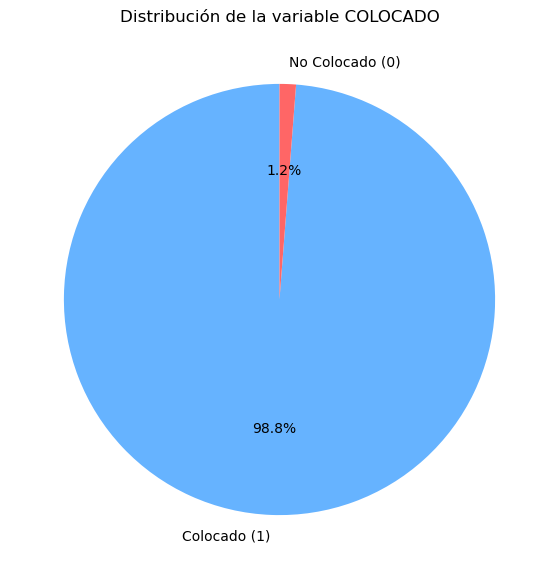

In [6]:
# Contamos los valores en la columna 'COLOCADO'
value_counts = df_colocado['COLOCADO'].value_counts()

# Crear gráfico de pastel
plt.figure(figsize=(7, 7))
plt.pie(value_counts, labels=['Colocado (1)', 'No Colocado (0)'], autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#ff6666'])
plt.title('Distribución de la variable COLOCADO')
plt.show()

Observamos que tenemos un desbalance claro en los datos que tenemos 

In [7]:
numerical_columns = df_colocado.select_dtypes(include=['number']).columns
numerical_columns

Index(['PERIODO_COMERCIAL', 'N_VECES_CAMPAÑA', 'N_VECES_CAMPAÑA_CONT', 'IVC',
       'score_aceptacion', 'SCORE', 'CUPO', 'MONTO_COLOCADO', 'COLOCADO'],
      dtype='object')

In [8]:
categorical_columnns = df_colocado.select_dtypes(exclude=['number']).columns
categorical_columnns


Index(['IDENTIFICACION', 'PRODUCTO', 'SEGMENTO', 'FECHA_CARGA',
       'FECHA_VIGENCIA', 'REGION', 'TIPO_APROBACION', 'CANAL', 'CLIENTE_BG',
       'SUB_PERFIL_RIESGOS', 'APROBACION_MES_ANTERIOR',
       'PRODUCTO_MES_ANTERIOR', 'fecha_liquidacion', 'CANAL_VENTA',
       'CONTACTABILIDAD_CELULAR', 'CONTACTABILIDAD_EMAIL',
       'CONTACTABILIDAD_FIJO', 'CONTACTABILIDAD_TOTAL'],
      dtype='object')

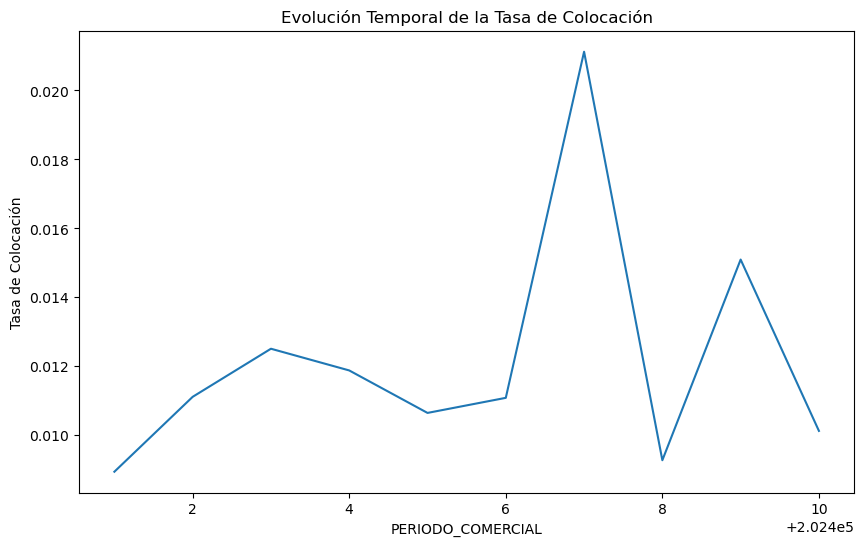

In [9]:
# Evolución temporal de la tasa de colocación
monthly_placement = df_colocado.groupby(df_colocado['PERIODO_COMERCIAL'])['COLOCADO'].mean()
monthly_placement.plot(kind='line', title='Evolución Temporal de la Tasa de Colocación', figsize=(10, 6))
plt.ylabel('Tasa de Colocación')
plt.show()



se obser que durante lo

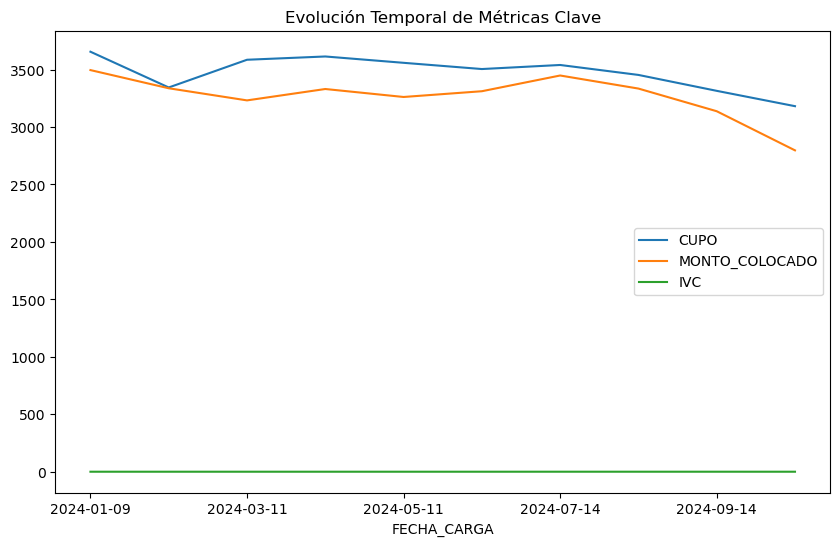

In [10]:
# Evolución de métricas clave
metrics = ['CUPO', 'MONTO_COLOCADO', 'IVC']
for metric in metrics:
    df_colocado.groupby(df_colocado['FECHA_CARGA'])[metric].mean().plot(kind='line', figsize=(10, 6), label=metric)
plt.title('Evolución Temporal de Métricas Clave')
plt.legend()
plt.show()

## Analisis de las variables categoricas

group_colocation / global_colocation >1 mas probable a aceptar la colocacion de credito 

group_colocation / global_colocation <1  menos probable a aceptar la colocacion de credito 

In [11]:
global_colocation_ratio = df_colocado['COLOCADO'].mean()
global_colocation_ratio

np.float64(0.012260240747949997)

In [12]:
df_colocado.CONTACTABILIDAD_TOTAL.value_counts()

CONTACTABILIDAD_TOTAL
AC    4783638
ND     394890
Name: count, dtype: int64

In [13]:
# Cálculo de la tasa global de colocación
global_colocation_ratio = df_colocado['COLOCADO'].mean()

# Variables categóricas a analizar
cat_vars = ['SEGMENTO', 'REGION', 'TIPO_APROBACION', 'CANAL', 'SUB_PERFIL_RIESGOS',"CLIENTE_BG", "APROBACION_MES_ANTERIOR","PRODUCTO_MES_ANTERIOR","CONTACTABILIDAD_TOTAL"]

# Iterar sobre cada variable categórica
for c in cat_vars:
    print(f"Análisis para la variable: {c}")
    # Agrupación por la variable categórica
    df_group = df_colocado.groupby(c)['COLOCADO'].agg(['mean', 'count']).rename(columns={
        'mean': 'colocation_rate',
        'count': 'n_samples'
    })
    # Cálculo de diferencia y riesgo relativo
    df_group['diff'] = df_group['colocation_rate'] - global_colocation_ratio
    df_group['acceptance_ratio'] = df_group['colocation_rate'] / global_colocation_ratio

    # Mostrar resultados
    display(df_group)
    print("\n" + "-" * 50 + "\n")


Análisis para la variable: SEGMENTO


,colocation_rate,n_samples,diff,acceptance_ratio
SEGMENTO,,,,
SEGMENTO1,0.012451,4251578,0.000190,1.015532
SEGMENTO2,0.014351,108492,0.002091,1.170555
SEGMENTO3,0.011436,578251,-0.000824,0.932788
SEGMENTO4,0.009879,213171,-0.002381,0.805807
SEGMENTO5,0.012818,21220,0.000558,1.045501
SEGMENTO6,0.001209,5790,-0.011051,0.098610
SEGMENTO7,0.000000,26,-0.012260,0.000000



--------------------------------------------------

Análisis para la variable: REGION


,colocation_rate,n_samples,diff,acceptance_ratio
REGION,,,,
CENTRO,0.018435,1614270,0.006175,1.503638
NORTE,0.010023,2760241,-0.002237,0.817524
SUR,0.007543,804017,-0.004717,0.615271



--------------------------------------------------

Análisis para la variable: TIPO_APROBACION


,colocation_rate,n_samples,diff,acceptance_ratio
TIPO_APROBACION,,,,
TIPO1,0.018732,3049279,0.006472,1.527863
TIPO2,0.002992,2129249,-0.009268,0.244052



--------------------------------------------------

Análisis para la variable: CANAL


,colocation_rate,n_samples,diff,acceptance_ratio
CANAL,,,,
ONLINE,0.019849,2375176,0.007588,1.618943
PRESENCIAL,0.005831,2803352,-0.006429,0.475592



--------------------------------------------------

Análisis para la variable: SUB_PERFIL_RIESGOS


,colocation_rate,n_samples,diff,acceptance_ratio
SUB_PERFIL_RIESGOS,,,,
PERFIL1,0.016109,2639909,0.003849,1.313913
PERFIL2,0.011825,1077129,-0.000435,0.964496
PERFIL3,0.006726,672580,-0.005534,0.548630
PERFIL4,0.004694,788910,-0.007566,0.382849



--------------------------------------------------

Análisis para la variable: CLIENTE_BG


,colocation_rate,n_samples,diff,acceptance_ratio
CLIENTE_BG,,,,
CLIENTE_TIPO1,0.023264,2442548,0.011004,1.897501
CLIENTE_TIPO2,0.002437,2735980,-0.009823,0.198755



--------------------------------------------------

Análisis para la variable: APROBACION_MES_ANTERIOR


,colocation_rate,n_samples,diff,acceptance_ratio
APROBACION_MES_ANTERIOR,,,,
TIPO1,0.011857,3013833,-0.000403,0.967136
TIPO2,0.007149,1554721,-0.005112,0.583068
TIPO3,0.005335,6748,-0.006925,0.435139



--------------------------------------------------

Análisis para la variable: PRODUCTO_MES_ANTERIOR


,colocation_rate,n_samples,diff,acceptance_ratio
PRODUCTO_MES_ANTERIOR,,,,
Producto1,0.009576,4079217,-0.002684,0.781070
Producto2,0.015719,470012,0.003459,1.282091
Producto3,0.016684,26073,0.004424,1.360816



--------------------------------------------------

Análisis para la variable: CONTACTABILIDAD_TOTAL


,colocation_rate,n_samples,diff,acceptance_ratio
CONTACTABILIDAD_TOTAL,,,,
AC,0.013128,4783638,0.000867,1.070751
ND,0.001752,394890,-0.010508,0.142932



--------------------------------------------------



* Segmentos: Es recomendable centrar las campañas de marketing en los segmentos con alta tasa de aceptación como SEGMENTO1 y SEGMENTO2. Además, los segmentos de mayor riesgo (SEGMENTO6 y SEGMENTO7) podrían beneficiarse de un enfoque diferenciado.

* Regiones: Las estrategias de colocación de créditos deben centrarse más en la región CENTRO, que tiene la tasa de aceptación más alta. Las regiones NORTE y SUR pueden necesitar esfuerzos adicionales para mejorar la tasa de aceptación.

* Tipo de Aprobación: Las personas con TIPO1 tienen una mayor probabilidad de aceptación, por lo que una posible estrategia sería reducir las barreras para que más personas pasen a TIPO1.

* Canal de Venta: La colocación online muestra una alta tasa de aceptación en comparación con la colocación presencial. Esto sugiere que el canal digital debería ser priorizado en futuras campañas.

* Sub Perfil de Riesgo: Los individuos con PERFIL1 tienen la mayor probabilidad de aceptar créditos. Las estrategias para los perfiles de riesgo alto (PERFIL3 y PERFIL4) podrían enfocarse en la gestión del riesgo o en ofrecer condiciones más atractivas.



## Mutual information

El mutual information score es una medida que evalúa la dependencia entre dos variables. Un valor más alto indica una mayor relación entre las variables, lo que sugiere que una variable es más informativa sobre la otra. En este caso, estamos utilizando el mutual_info_score para medir la relación entre las variables categóricas y la variable COLOCADO (aceptación de crédito).

In [14]:
from sklearn.metrics import mutual_info_score

In [15]:
def mutual_info_aceptance_score(series):
    return mutual_info_score(series, df_colocado.COLOCADO)

In [16]:
mi = df_colocado[cat_vars].apply(mutual_info_aceptance_score)
mi.sort_values(ascending=False)

TypeError: '<' not supported between instances of 'str' and 'NoneType'

El análisis de información mutua muestra que CLIENTE_BG tiene la mayor relación con la colocación de crédito, seguido por TIPO_APROBACION y CANAL. Esto sugiere que el perfil del cliente y el canal de contratación son factores clave para predecir la aceptación de créditos. En cambio, REGION, CONTACTABILIDAD_TOTAL y SEGMENTO tienen una relación mucho más débil, indicando que su influencia es mínima en la decisión de colocación.


## Importancia de caracteristicas numericas

In [ ]:
numeric_col=['N_VECES_CAMPAÑA', 'N_VECES_CAMPAÑA_CONT', 'IVC', 'score_aceptacion',
       'SCORE', 'CUPO', 'MONTO_COLOCADO']

In [ ]:
df_colocado[numeric_col].corrwith(df_colocado.COLOCADO).abs().sort_values(ascending=False)

El análisis se basó en la correlación absoluta entre las variables numéricas y la colocación de crédito, utilizando el método de correlación de Pearson. Esto permitió identificar qué factores están más estrechamente relacionados con la aceptación del crédito. Los resultados indican que el monto colocado es el factor más influyente, mientras que otras variables como el score de crédito o el cupo ofertado tienen una relación mucho más débil, sugiriendo que la cantidad efectiva colocada y la relación con el banco son determinantes clave.

tenemos un analisis que hacer que score de aceptacion tiene una relacion baja con repecto si fue colocado o no , por lo que podriamos indicar que este  no es un buen indicador para poder indicar si el credito es colocado.

In [ ]:
# en base a la importancia de las caracteristicas las variables categoricas con las que nos vamos a quedar son las siguientes

In [ ]:
# Selección de columnas relevantes según el análisis anterior
columns_to_keep = [
    'MONTO_COLOCADO', 
    'CLIENTE_BG', 
    'TIPO_APROBACION', 
    'CANAL', 
    'IVC', 
    'score_aceptacion'
]

# Mantener solo las columnas relevantes
df_colocado = df_colocado[columns_to_keep]



# Codificacion de variables cateforicas

In [ ]:
#import pandas as pd
#from sklearn.preprocessing import LabelEncoder

## Codificación One-Hot Encoding para variables nominales
#df_colocado = pd.get_dummies(df_colocado, columns=['SEGMENTO', 'REGION', 'TIPO_APROBACION', 
#                                                   'CANAL', 'SUB_PERFIL_RIESGOS', 
#                                                   'APROBACION_MES_ANTERIOR', 'PRODUCTO_MES_ANTERIOR'])
#
## Codificación Label Encoding para variables binarias
#le = LabelEncoder()
#df_colocado['CLIENTE_BG'] = le.fit_transform(df_colocado['CLIENTE_BG'])
#df_colocado['CONTACTABILIDAD_TOTAL'] = le.fit_transform(df_colocado['CONTACTABILIDAD_TOTAL'])
#
## Eliminar columnas originales que se codificaron con get_dummies
#df_colocado = df_colocado.drop(columns=['SEGMENTO', 'REGION', 'TIPO_APROBACION', 
#                                         'CANAL', 'SUB_PERFIL_RIESGOS', 
#                                         'APROBACION_MES_ANTERIOR', 'PRODUCTO_MES_ANTERIOR'])

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Codificación One-Hot Encoding para las variables categóricas
df_colocado = pd.get_dummies(df_colocado, columns=['TIPO_APROBACION', 'CANAL'])

# Codificación Label Encoding para las variables binarias
le = LabelEncoder()
df_colocado['CLIENTE_BG'] = le.fit_transform(df_colocado['CLIENTE_BG'])


In [ ]:
df_colocado.head()

Se utiliza para las variables categóricas que no tienen un orden inherente, es decir, las categorías no pueden ser ordenadas o clasificadas de forma natural como lo son ['SEGMENTO', 'REGION', 'TIPO_APROBACION', 
                                                   'CANAL', 'SUB_PERFIL_RIESGOS', 
                                                   'APROBACION_MES_ANTERIOR', 'PRODUCTO_MES_ANTERIOR']

In [ ]:
El Label Encoding convierte las categorías en valores numéricos (0 o 1). Dado que estas variables tienen solo dos categorías posibles, la codificación de estas categorías numéricas no introduce un orden que el modelo no pueda interpretar

# separar dataset 

In [ ]:
# eliminamos la variable identificacion y la variable producto porque tiene un solo valor por lo cual no nos va aportar a nuestro model
# df_colocado.drop(columns=['COLOCADO'])

In [ ]:
# Importar las librerías necesarias
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split


In [ ]:
# eliminamos la variable identificacion y la variable producto porque tiene un solo valor por lo cual no nos va aportar a nuestro modelo
X = df_colocado.drop(columns=['COLOCADO',"PERIODO_COMERCIAL","PRODUCTO","FECHA_CARGA","FECHA_VIGENCIA","fecha_liquidacion"])  
y = df_colocado['COLOCADO']  # Etiqueta (clase)

# Dividir los datos en entrenamiento y prueba (opcional, pero recomendado)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.head()

Tratamiento el desbalance de las clases 

In [ ]:
value_counts = df_colocado['COLOCADO'].value_counts()
value_counts

como tenemos un balance significativo queremos aplicar tecnicas de remuestreo para que la cantidad de valores para cada variables sean iguales y no cree ningun sesgo en el modelo 

In [ ]:
# Inicializar el RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Aplicar el submuestreo a los datos de entrenamiento
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

# Verificar las clases balanceadas
print(f"Distribución original de clases en y_train: {y_train.value_counts()}")
print(f"Distribución de clases después de submuestreo: {y_resampled.value_counts()}")


## Random fores classifier 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score


In [ ]:
scores = []

for d in [5, 10, 15]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=d,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_test)[:, 1]
        auc = roc_auc_score(y_test, y_pred)

        scores.append((d, n, auc))

In [ ]:
columns = ['max_depth', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

In [ ]:
for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth == d]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             label='max_depth=%d' % d)

plt.legend()

In [ ]:
max_depth = 10

In [ ]:
scores = []

for s in [1, 3, 5, 10, 50]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=max_depth,
                                    min_samples_leaf=s,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_test)[:, 1]
        auc = roc_auc_score(y_test, y_pred)

        scores.append((s, n, auc))

In [ ]:
columns = ['min_samples_leaf', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

In [ ]:
colors = ['black', 'blue', 'orange', 'red', 'grey']
values = [1, 3, 5, 10, 50]

for s, col in zip(values, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             color=col,
             label='min_samples_leaf=%d' % s)

plt.legend()